**Implemented by: Anika Shrivastava**

## **important imports**



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import os
import random
import cv2
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D,Flatten,Input, LeakyReLU, Add, Concatenate, concatenate
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from tensorflow.keras.models import load_model
import math
import pandas as pd
#import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### **drive mounted**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### **reading the images**

In [3]:
def read(path):
    path = path
    dataset = []

    for filename in os.listdir(path):
        if filename.endswith(".jpg"):
            image_path = os.path.join(path, filename)
            img = image.load_img(image_path,target_size=(256,256,3),color_mode= 'rgb')
            img=image.img_to_array(img)
            img=img/255
            dataset.append(img)
    dataset= np.array(dataset)
    return dataset

### **Dataset BSDS300 can be accessed from the link: https://www.kaggle.com/datasets/adheshgarg/bsds300**

In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/BSDS300_all'    # change the path accrodingly
dataset = read(path)

In [5]:
dataset.shape

(300, 256, 256, 3)

In [6]:
def show_img(dataset):
    fig, ax = plt.subplots(1,4)
    fig.set_size_inches(40, 20)
    for i in range(4,8):
        ax[i-4].imshow(dataset[i].reshape(256,256,3))
    plt.show()

def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 10 * math.log10(PIXEL_MAX / math.sqrt(mse))

In [12]:
train=dataset[0:150]
val=dataset[150:200]
test= dataset[200:300]

## **Experiment-6 (Analyzing the trade-off between reducing bottleneck size and the PSNR of reconstruction)**

Training different autoencoder architecture in order to decrease the bottleneck size, initially decreasing the filter size and later decreasing the no. of filters as well:-
1. Our initial U-net model : 1,31,072
2. 16x16x128 : 32,768
3. 8x8x128 : 8,192
4. 32x32x64 : 65,536
5. 32x32x32 : 32,768
6. 32x32x16 : 16,384
7. 32x32x8 : 8,192
8. 16x16x64 : 16,384
9. 16x16x16 : 4,096
10. 16x16x8 : 2,048
11. 8x8x64 : 4,096
12. 8x8x16 : 1,024
13. 8x8x8 : 512






**The PSNR results for each architecture looks like this:-**

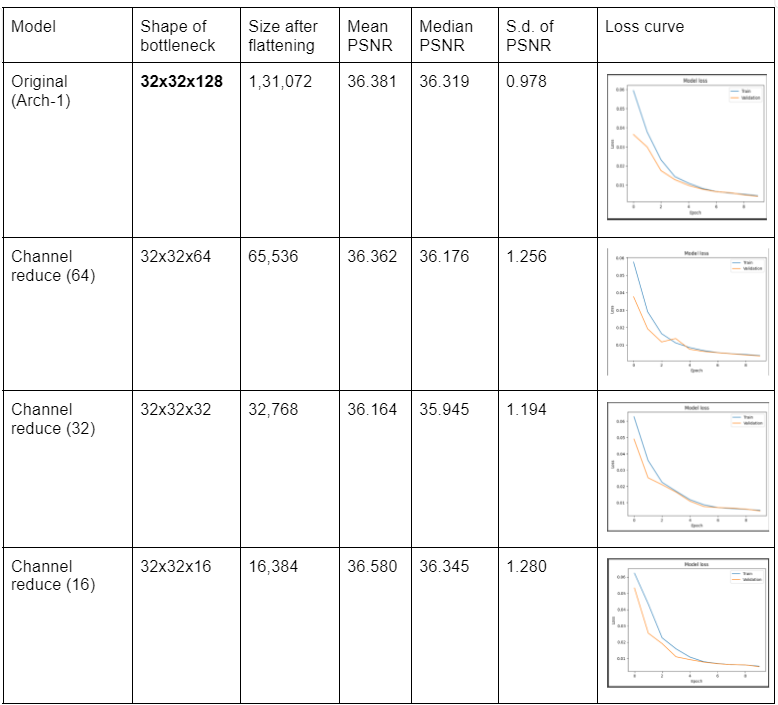

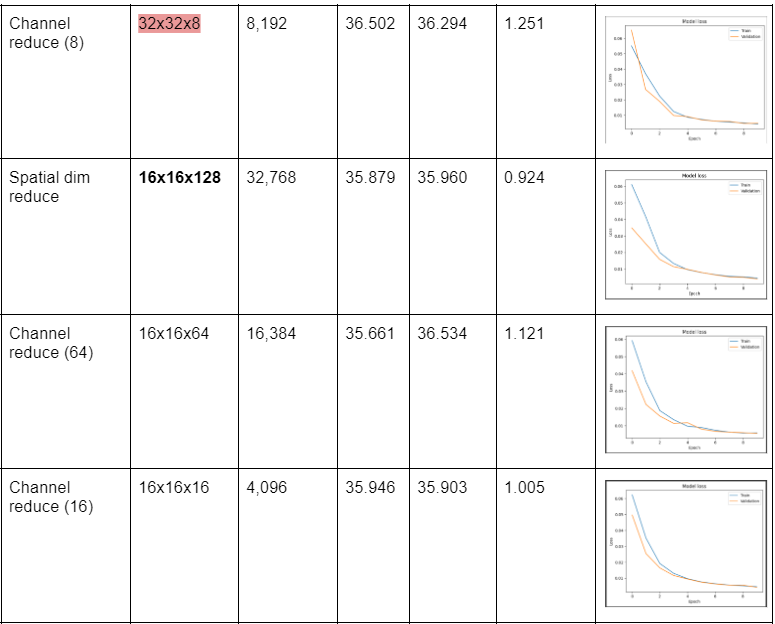

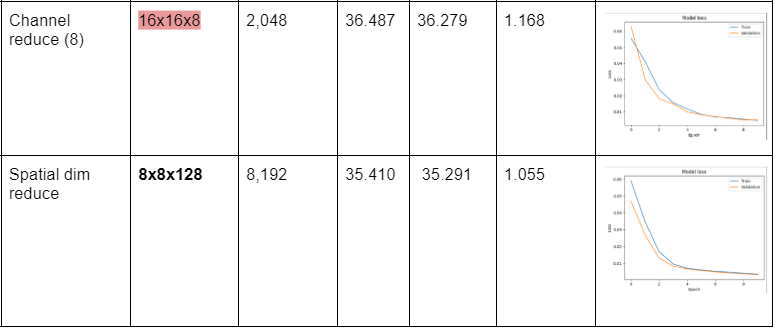

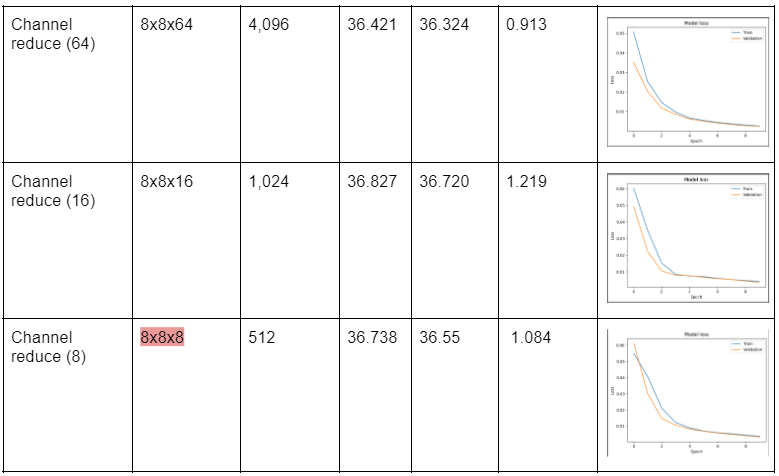

###Architecture1 (32x32x128) : 1,31,072

In [ ]:
# Input layer for 256x256x3 images
input_img = Input(shape=(256, 256, 3))

# Encoder
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
# p1 = Dropout(0.3)(x1)
p1 = MaxPooling2D((2, 2), padding='same')(x1)


x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
# p2 = Dropout(0.3)(x2)
p2 = MaxPooling2D((2, 2), padding='same')(x2)


x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
encoded = MaxPooling2D((2, 2), padding='same')(x3)

# Decoder
x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x3], axis=-1)  # Adding skip connection
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x2], axis=-1)  # Adding skip connection
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x1], axis=-1)  # Adding skip connection
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# This model maps an input to its reconstruction
autoencoder1 = Model(input_img, decoded)
autoencoder1.compile(optimizer='adam', loss='mse')
autoencoder1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_17 (Conv2D)          (None, 256, 256, 32)         896       ['input_2[0][0]']             
                                                                                                  
 conv2d_18 (Conv2D)          (None, 256, 256, 32)         9248      ['conv2d_17[0][0]']           
                                                                                                  
 max_pooling2d_5 (MaxPoolin  (None, 128, 128, 32)         0         ['conv2d_18[0][0]']           
 g2D)                                                                                       

In [ ]:
history= autoencoder1.fit(train, train, epochs=10, batch_size=12, validation_data=(val, val))

Epoch 1/10
13/13 [==============================] - 183s 13s/step - loss: 0.0595 - val_loss: 0.0365
Epoch 2/10
13/13 [==============================] - 141s 11s/step - loss: 0.0377 - val_loss: 0.0299
Epoch 3/10
13/13 [==============================] - 142s 11s/step - loss: 0.0232 - val_loss: 0.0175
Epoch 4/10
13/13 [==============================] - 146s 11s/step - loss: 0.0144 - val_loss: 0.0128
Epoch 5/10
13/13 [==============================] - 150s 11s/step - loss: 0.0109 - val_loss: 0.0098
Epoch 6/10
13/13 [==============================] - 142s 11s/step - loss: 0.0082 - val_loss: 0.0078
Epoch 7/10
13/13 [==============================] - 146s 11s/step - loss: 0.0066 - val_loss: 0.0065
Epoch 8/10
13/13 [==============================] - 143s 11s/step - loss: 0.0058 - val_loss: 0.0060
Epoch 9/10
13/13 [==============================] - 151s 12s/step - loss: 0.0052 - val_loss: 0.0049
Epoch 10/10
13/13 [==============================] - 155s 12s/step - loss: 0.0044 - val_loss: 0.0041

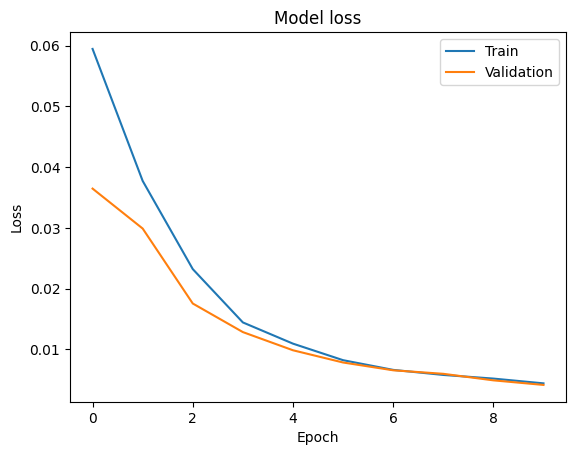

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
train_pred = autoencoder1.predict(train)

5/5 [==============================] - 22s 4s/step


In [ ]:
psnr(train[48],train_pred[48])

35.47551170043935

original shape (256, 256, 3)


Text(0.5, 1.0, 'Reconstructed image (PSNR:35.475)')

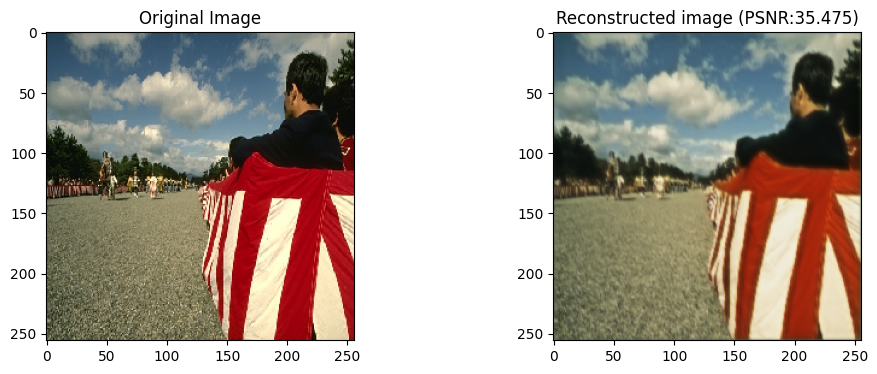

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
print("original shape", np.shape(train[48]))
ax[0].imshow(train[48])
ax[0].set_title("Original Image")

ax[1].imshow(train_pred[48])
ax[1].set_title("Reconstructed image (PSNR:35.475)")

In [ ]:
autoencoder1.load_weights('/content/drive/MyDrive/Colab Notebooks/TryingDiffArch2/arch1.h5')      # repo contains the weights of the model

In [ ]:
test_pred= autoencoder1.predict(test)
psnr_test=[]
for i in range(0,100):
  x= psnr(test[i],test_pred[i])
  psnr_test.append(x)

4/4 [==============================] - 25s 5s/step


In [ ]:
import statistics

# Mean_test
mean_value = statistics.mean(psnr_test)
print(f"MeanPSNR of test data: {mean_value}")
# Median_test
median_value = statistics.median(psnr_test)
print(f"MedianPSNR of test data: {median_value}")
# Standard Deviation_test
std_deviation = np.std(psnr_test)
print(f"Standard-DeviationPSNR of test data: {std_deviation}")

MeanPSNR of test data: 36.347349539521765
MedianPSNR of test data: 36.25799470075552
Standard-DeviationPSNR of test data: 1.1685949584920334


###Architecture 2: (16x16x128) : 32,768

In [ ]:
# Input layer for 256x256x3 images
input_img = Input(shape=(256, 256, 3))

# Encoder
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
p1 = MaxPooling2D((2, 2), padding='same')(x1)


x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
p2 = MaxPooling2D((2, 2), padding='same')(x2)


x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
p3 = MaxPooling2D((2, 2), padding='same')(x3)

x4 = Conv2D(128, (3, 3), activation='relu', padding='same')(p3)    #learning even further
x4 = Conv2D(128, (3, 3), activation='relu', padding='same')(x4)

#bottleneck
encoded = MaxPooling2D((2, 2), padding='same')(x4)

# Decoder
x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x4], axis=-1)  # Adding skip connection
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x3], axis=-1)  # Adding skip connection
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x2], axis=-1)  # Adding skip connection
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x1], axis=-1)  # Adding skip connection
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder2 = Model(input_img,decoded)
autoencoder2.compile(optimizer='adam', loss='mse')
autoencoder2.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_130 (Conv2D)         (None, 256, 256, 32)         896       ['input_12[0][0]']            
                                                                                                  
 conv2d_131 (Conv2D)         (None, 256, 256, 32)         9248      ['conv2d_130[0][0]']          
                                                                                                  
 max_pooling2d_41 (MaxPooli  (None, 128, 128, 32)         0         ['conv2d_131[0][0]']          
 ng2D)                                                                                     

In [ ]:
history= autoencoder2.fit(train, train, epochs=10, batch_size=12, validation_data=(val, val))

Epoch 1/10
13/13 [==============================] - 165s 13s/step - loss: 0.0611 - val_loss: 0.0349
Epoch 2/10
13/13 [==============================] - 172s 13s/step - loss: 0.0417 - val_loss: 0.0253
Epoch 3/10
13/13 [==============================] - 160s 12s/step - loss: 0.0200 - val_loss: 0.0158
Epoch 4/10
13/13 [==============================] - 152s 12s/step - loss: 0.0133 - val_loss: 0.0114
Epoch 5/10
13/13 [==============================] - 154s 12s/step - loss: 0.0096 - val_loss: 0.0097
Epoch 6/10
13/13 [==============================] - 159s 12s/step - loss: 0.0078 - val_loss: 0.0079
Epoch 7/10
13/13 [==============================] - 152s 12s/step - loss: 0.0065 - val_loss: 0.0064
Epoch 8/10
13/13 [==============================] - 151s 12s/step - loss: 0.0055 - val_loss: 0.0052
Epoch 9/10
13/13 [==============================] - 154s 12s/step - loss: 0.0052 - val_loss: 0.0049
Epoch 10/10
13/13 [==============================] - 166s 13s/step - loss: 0.0045 - val_loss: 0.0040

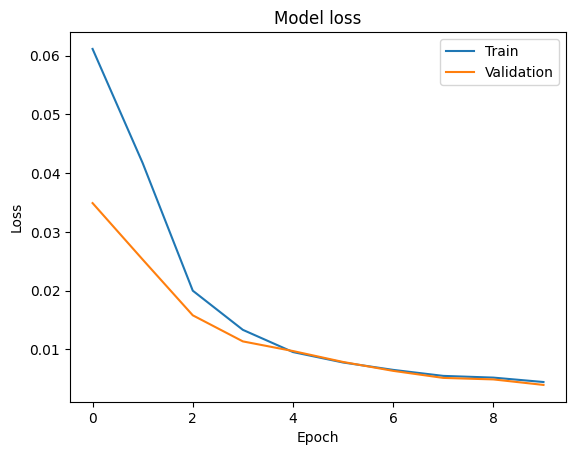

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
train_pred = autoencoder2.predict(train)

5/5 [==============================] - 22s 4s/step


In [ ]:
psnr(train[48],train_pred[48])

34.3259303079569

original shape (256, 256, 3)


Text(0.5, 1.0, 'Reconstructed image (PSNR:34.325)')

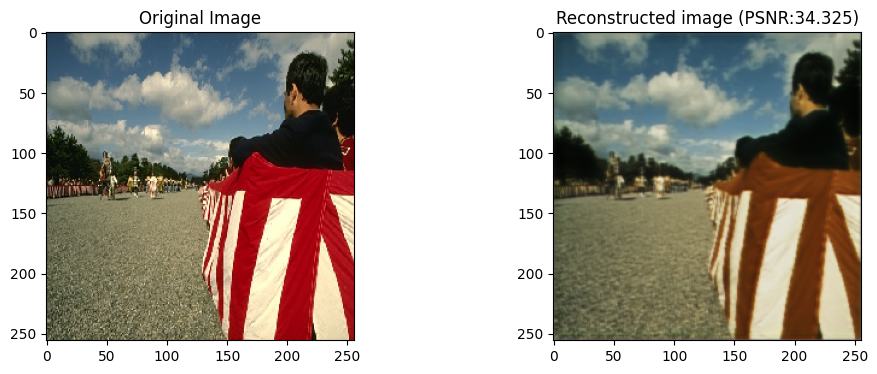

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
print("original shape", np.shape(train[48]))
ax[0].imshow(train[48])
ax[0].set_title("Original Image")

ax[1].imshow(train_pred[48])
ax[1].set_title("Reconstructed image (PSNR:34.325)")

In [ ]:
autoencoder2.load_weights('/content/drive/MyDrive/Colab Notebooks/TryingDiffArch2/arch2.h5')      # repo contains the weights of the model

In [ ]:
test_pred= autoencoder2.predict(test)
psnr_test=[]
for i in range(0,100):
  x= psnr(test[i],test_pred[i])
  psnr_test.append(x)

4/4 [==============================] - 15s 3s/step


In [ ]:
import statistics

# Mean_test
mean_value = statistics.mean(psnr_test)
print(f"MeanPSNR of test data: {mean_value}")
# Median_test
median_value = statistics.median(psnr_test)
print(f"MedianPSNR of test data: {median_value}")
# Standard Deviation_test
std_deviation = np.std(psnr_test)
print(f"Standard-DeviationPSNR of test data: {std_deviation}")

MeanPSNR of test data: 36.93399947552758
MedianPSNR of test data: 36.700674354531195
Standard-DeviationPSNR of test data: 1.259906429039156


###Architecture 3: (8x8x128) : 8,192

In [8]:
# Input layer for 256x256x3 images
input_img = Input(shape=(256, 256, 3))

# Encoder
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
p1 = MaxPooling2D((2, 2), padding='same')(x1)


x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
p2 = MaxPooling2D((2, 2), padding='same')(x2)


x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
p3 = MaxPooling2D((2, 2), padding='same')(x3)

x4 = Conv2D(128, (3, 3), activation='relu', padding='same')(p3)
x4 = Conv2D(128, (3, 3), activation='relu', padding='same')(x4)
p4 = MaxPooling2D((2, 2), padding='same')(x4)

x5 = Conv2D(128, (3, 3), activation='relu', padding='same')(p4)
x5 = Conv2D(128, (3, 3), activation='relu', padding='same')(x5)

#bottleneck
encoded = MaxPooling2D((2, 2), padding='same')(x5)

# Decoder
x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x5], axis=-1)  # Adding skip connection
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x4], axis=-1)  # Adding skip connection
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x3], axis=-1)  # Adding skip connection
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x2], axis=-1)  # Adding skip connection
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x1], axis=-1)  # Adding skip connection
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder3 = Model(input_img,decoded)
autoencoder3.compile(optimizer='adam', loss='mse')
autoencoder3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 32  9248        ['conv2d[0][0]']                 
                                )                                                             

In [9]:
history= autoencoder3.fit(train, train, epochs=10, batch_size=12, validation_data=(val, val))

Epoch 1/10
19/19 [==============================] - 310s 15s/step - loss: 0.0672 - val_loss: 0.0418
Epoch 2/10
19/19 [==============================] - 290s 15s/step - loss: 0.0326 - val_loss: 0.0168
Epoch 3/10
19/19 [==============================] - 279s 15s/step - loss: 0.0161 - val_loss: 0.0132
Epoch 4/10
19/19 [==============================] - 290s 15s/step - loss: 0.0121 - val_loss: 0.0074
Epoch 5/10
19/19 [==============================] - 285s 15s/step - loss: 0.0083 - val_loss: 0.0059
Epoch 6/10
19/19 [==============================] - 290s 15s/step - loss: 0.0061 - val_loss: 0.0047
Epoch 7/10
19/19 [==============================] - 286s 15s/step - loss: 0.0047 - val_loss: 0.0038
Epoch 8/10
19/19 [==============================] - 287s 15s/step - loss: 0.0038 - val_loss: 0.0027
Epoch 9/10
19/19 [==============================] - 294s 16s/step - loss: 0.0029 - val_loss: 0.0024
Epoch 10/10
19/19 [==============================] - 285s 15s/step - loss: 0.0025 - val_loss: 0.0018

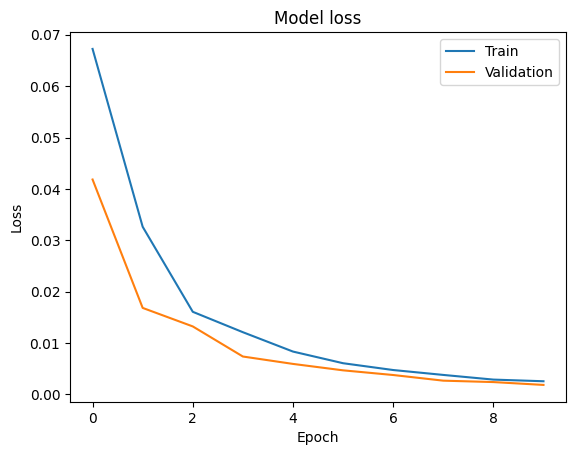

In [10]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [13]:
test_pred= autoencoder3.predict(test)
psnr_test=[]
for i in range(0,100):
  x= psnr(test[i],test_pred[i])
  psnr_test.append(x)

4/4 [==============================] - 32s 7s/step


In [14]:
import statistics

# Mean_test
mean_value = statistics.mean(psnr_test)
print(f"MeanPSNR of test data: {mean_value}")
# Median_test
median_value = statistics.median(psnr_test)
print(f"MedianPSNR of test data: {median_value}")
# Standard Deviation_test
std_deviation = np.std(psnr_test)
print(f"Standard-DeviationPSNR of test data: {std_deviation}")

MeanPSNR of test data: 37.776154036485515
MedianPSNR of test data: 37.71107972360802
Standard-DeviationPSNR of test data: 1.1784804250812313


In [15]:
autoencoder3.save_weights('/content/drive/MyDrive/Colab Notebooks/TryingDiffArch2/arch3.h5')      # repo contains the weights of the model

##Architecture 4: (32x32x64) : 65,536

In [ ]:
# Input layer for 256x256x3 images
input_img = Input(shape=(256, 256, 3))

# Encoder
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
# p1 = Dropout(0.3)(x1)
p1 = MaxPooling2D((2, 2), padding='same')(x1)


x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
# p2 = Dropout(0.3)(x2)
p2 = MaxPooling2D((2, 2), padding='same')(x2)


x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
x3 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)
encoded = MaxPooling2D((2, 2), padding='same')(x3)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x3], axis=-1)  # Adding skip connection
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x2], axis=-1)  # Adding skip connection
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x1], axis=-1)  # Adding skip connection
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# This model maps an input to its reconstruction
autoencoder4 = Model(input_img, decoded)
autoencoder4.compile(optimizer='adam', loss='mse')
autoencoder4.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_52 (Conv2D)          (None, 256, 256, 32)         896       ['input_5[0][0]']             
                                                                                                  
 conv2d_53 (Conv2D)          (None, 256, 256, 32)         9248      ['conv2d_52[0][0]']           
                                                                                                  
 max_pooling2d_17 (MaxPooli  (None, 128, 128, 32)         0         ['conv2d_53[0][0]']           
 ng2D)                                                                                      

In [ ]:
history= autoencoder4.fit(train, train, epochs=10, batch_size=12, validation_data=(val, val))

Epoch 1/10
13/13 [==============================] - 161s 12s/step - loss: 0.0576 - val_loss: 0.0377
Epoch 2/10
13/13 [==============================] - 126s 10s/step - loss: 0.0291 - val_loss: 0.0193
Epoch 3/10
13/13 [==============================] - 126s 10s/step - loss: 0.0165 - val_loss: 0.0117
Epoch 4/10
13/13 [==============================] - 130s 10s/step - loss: 0.0112 - val_loss: 0.0137
Epoch 5/10
13/13 [==============================] - 123s 10s/step - loss: 0.0085 - val_loss: 0.0075
Epoch 6/10
13/13 [==============================] - 126s 10s/step - loss: 0.0068 - val_loss: 0.0063
Epoch 7/10
13/13 [==============================] - 126s 10s/step - loss: 0.0056 - val_loss: 0.0055
Epoch 8/10
13/13 [==============================] - 128s 10s/step - loss: 0.0050 - val_loss: 0.0049
Epoch 9/10
13/13 [==============================] - 126s 10s/step - loss: 0.0045 - val_loss: 0.0043
Epoch 10/10
13/13 [==============================] - 126s 10s/step - loss: 0.0039 - val_loss: 0.0037

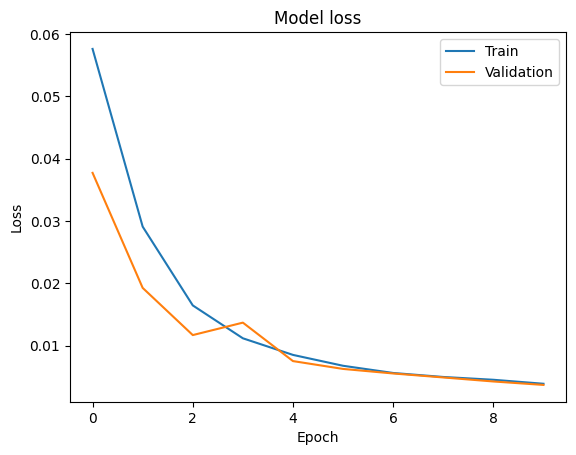

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
train_pred = autoencoder4.predict(train)

5/5 [==============================] - 35s 7s/step


In [ ]:
psnr(train[48],train_pred[48])

35.071192780464045

original shape (256, 256, 3)


Text(0.5, 1.0, 'Reconstructed image (PSNR:35.071)')

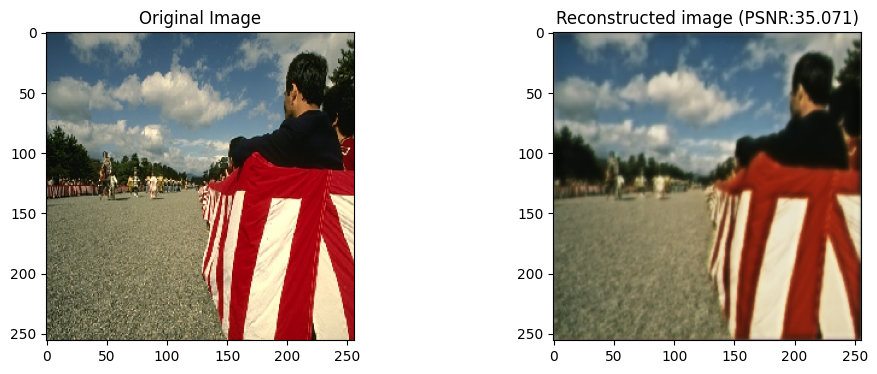

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
print("original shape", np.shape(train[48]))
ax[0].imshow(train[48])
ax[0].set_title("Original Image")

ax[1].imshow(train_pred[48])
ax[1].set_title("Reconstructed image (PSNR:35.071)")

In [ ]:
autoencoder4.save_weights('/content/drive/MyDrive/Colab Notebooks/TryingDiffArch2/arch4.h5')         # repo contains the weights of the model

In [ ]:
test_pred= autoencoder4.predict(test)
psnr_test=[]
for i in range(0,100):
  x= psnr(test[i],test_pred[i])
  psnr_test.append(x)

4/4 [==============================] - 27s 6s/step


In [ ]:
import statistics

# Mean_test
mean_value = statistics.mean(psnr_test)
print(f"MeanPSNR of test data: {mean_value}")
# Median_test
median_value = statistics.median(psnr_test)
print(f"MedianPSNR of test data: {median_value}")
# Standard Deviation_test
std_deviation = np.std(psnr_test)
print(f"Standard-DeviationPSNR of test data: {std_deviation}")

MeanPSNR of test data: 36.362215415054315
MedianPSNR of test data: 36.176983057492265
Standard-DeviationPSNR of test data: 1.256235200542793


##Architecture 5: (32x32x32) : 32,768

In [ ]:
# Input layer for 256x256x3 images
input_img = Input(shape=(256, 256, 3))

# Encoder
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
# p1 = Dropout(0.3)(x1)
p1 = MaxPooling2D((2, 2), padding='same')(x1)


x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
# p2 = Dropout(0.3)(x2)
p2 = MaxPooling2D((2, 2), padding='same')(x2)


x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
x3 = Conv2D(32, (3, 3), activation='relu', padding='same')(x3)
encoded = MaxPooling2D((2, 2), padding='same')(x3)

# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x3], axis=-1)  # Adding skip connection
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x2], axis=-1)  # Adding skip connection
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x1], axis=-1)  # Adding skip connection
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# This model maps an input to its reconstruction
autoencoder5 = Model(input_img, decoded)
autoencoder5.compile(optimizer='adam', loss='mse')
autoencoder5.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_62 (Conv2D)          (None, 256, 256, 32)         896       ['input_6[0][0]']             
                                                                                                  
 conv2d_63 (Conv2D)          (None, 256, 256, 32)         9248      ['conv2d_62[0][0]']           
                                                                                                  
 max_pooling2d_20 (MaxPooli  (None, 128, 128, 32)         0         ['conv2d_63[0][0]']           
 ng2D)                                                                                      

In [ ]:
history= autoencoder5.fit(train, train, epochs=10, batch_size=12, validation_data=(val, val))

Epoch 1/10
13/13 [==============================] - 152s 11s/step - loss: 0.0628 - val_loss: 0.0491
Epoch 2/10
13/13 [==============================] - 117s 9s/step - loss: 0.0360 - val_loss: 0.0253
Epoch 3/10
13/13 [==============================] - 120s 9s/step - loss: 0.0225 - val_loss: 0.0210
Epoch 4/10
13/13 [==============================] - 120s 9s/step - loss: 0.0171 - val_loss: 0.0165
Epoch 5/10
13/13 [==============================] - 118s 9s/step - loss: 0.0118 - val_loss: 0.0109
Epoch 6/10
13/13 [==============================] - 120s 9s/step - loss: 0.0087 - val_loss: 0.0076
Epoch 7/10
13/13 [==============================] - 118s 9s/step - loss: 0.0070 - val_loss: 0.0070
Epoch 8/10
13/13 [==============================] - 118s 9s/step - loss: 0.0063 - val_loss: 0.0066
Epoch 9/10
13/13 [==============================] - 122s 9s/step - loss: 0.0059 - val_loss: 0.0060
Epoch 10/10
13/13 [==============================] - 119s 9s/step - loss: 0.0053 - val_loss: 0.0049


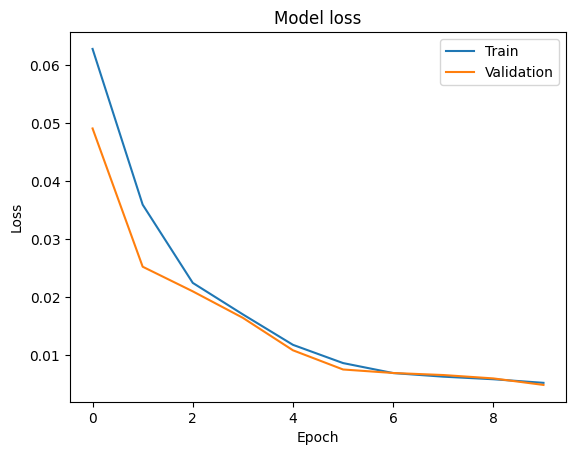

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
train_pred = autoencoder5.predict(train)

5/5 [==============================] - 31s 6s/step


In [ ]:
psnr(train[48],train_pred[48])

35.13787197098006

original shape (256, 256, 3)


Text(0.5, 1.0, 'Reconstructed image (PSNR:35.137)')

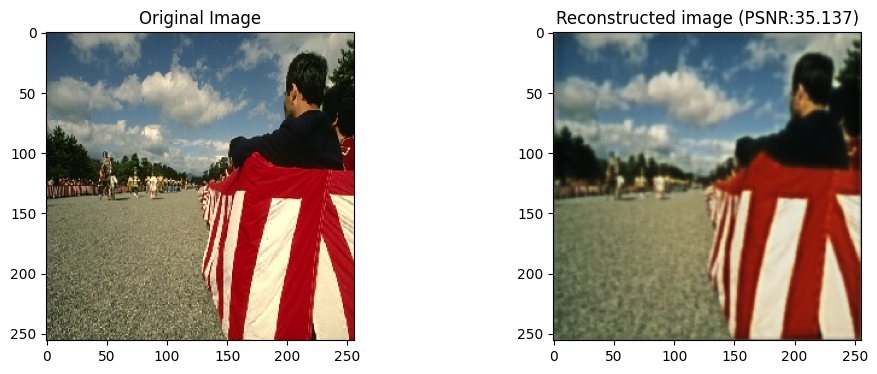

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
print("original shape", np.shape(train[48]))
ax[0].imshow(train[48])
ax[0].set_title("Original Image")

ax[1].imshow(train_pred[48])
ax[1].set_title("Reconstructed image (PSNR:35.137)")

In [ ]:
test_pred= autoencoder5.predict(test)
psnr_test=[]
for i in range(0,100):
  x= psnr(test[i],test_pred[i])
  psnr_test.append(x)

4/4 [==============================] - 21s 5s/step


In [ ]:
import statistics

# Mean_test
mean_value = statistics.mean(psnr_test)
print(f"MeanPSNR of test data: {mean_value}")
# Median_test
median_value = statistics.median(psnr_test)
print(f"MedianPSNR of test data: {median_value}")
# Standard Deviation_test
std_deviation = np.std(psnr_test)
print(f"Standard-DeviationPSNR of test data: {std_deviation}")

MeanPSNR of test data: 36.16490462508103
MedianPSNR of test data: 35.94560388741722
Standard-DeviationPSNR of test data: 1.1945105581371729


In [ ]:
autoencoder5.save_weights('/content/drive/MyDrive/Colab Notebooks/TryingDiffArch2/arch5.h5')          # repo contains the weights of the model

##Architecture 6: (32x32x16) : 16,384

In [ ]:
# Input layer for 256x256x3 images
input_img = Input(shape=(256, 256, 3))

# Encoder
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
# p1 = Dropout(0.3)(x1)
p1 = MaxPooling2D((2, 2), padding='same')(x1)


x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
# p2 = Dropout(0.3)(x2)
p2 = MaxPooling2D((2, 2), padding='same')(x2)


x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
x3 = Conv2D(16, (3, 3), activation='relu', padding='same')(x3)
encoded = MaxPooling2D((2, 2), padding='same')(x3)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x3], axis=-1)  # Adding skip connection
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x2], axis=-1)  # Adding skip connection
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x1], axis=-1)  # Adding skip connection
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# This model maps an input to its reconstruction
autoencoder6 = Model(input_img, decoded)
autoencoder6.compile(optimizer='adam', loss='mse')
autoencoder6.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_72 (Conv2D)          (None, 256, 256, 32)         896       ['input_7[0][0]']             
                                                                                                  
 conv2d_73 (Conv2D)          (None, 256, 256, 32)         9248      ['conv2d_72[0][0]']           
                                                                                                  
 max_pooling2d_23 (MaxPooli  (None, 128, 128, 32)         0         ['conv2d_73[0][0]']           
 ng2D)                                                                                      

In [ ]:
history= autoencoder6.fit(train, train, epochs=10, batch_size=12, validation_data=(val, val))

Epoch 1/10
13/13 [==============================] - 157s 11s/step - loss: 0.0623 - val_loss: 0.0532
Epoch 2/10
13/13 [==============================] - 119s 9s/step - loss: 0.0434 - val_loss: 0.0255
Epoch 3/10
13/13 [==============================] - 126s 10s/step - loss: 0.0226 - val_loss: 0.0191
Epoch 4/10
13/13 [==============================] - 116s 9s/step - loss: 0.0159 - val_loss: 0.0110
Epoch 5/10
13/13 [==============================] - 120s 9s/step - loss: 0.0108 - val_loss: 0.0092
Epoch 6/10
13/13 [==============================] - 117s 9s/step - loss: 0.0080 - val_loss: 0.0077
Epoch 7/10
13/13 [==============================] - 116s 9s/step - loss: 0.0069 - val_loss: 0.0067
Epoch 8/10
13/13 [==============================] - 116s 9s/step - loss: 0.0062 - val_loss: 0.0062
Epoch 9/10
13/13 [==============================] - 127s 10s/step - loss: 0.0060 - val_loss: 0.0060
Epoch 10/10
13/13 [==============================] - 115s 9s/step - loss: 0.0052 - val_loss: 0.0049


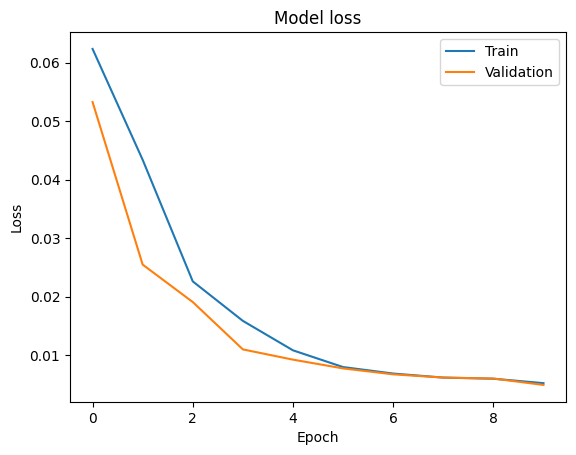

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
train_pred = autoencoder6.predict(train)

5/5 [==============================] - 47s 10s/step


In [ ]:
psnr(train[48],train_pred[48])

35.37039906881448

original shape (256, 256, 3)


Text(0.5, 1.0, 'Reconstructed image (PSNR:35.370)')

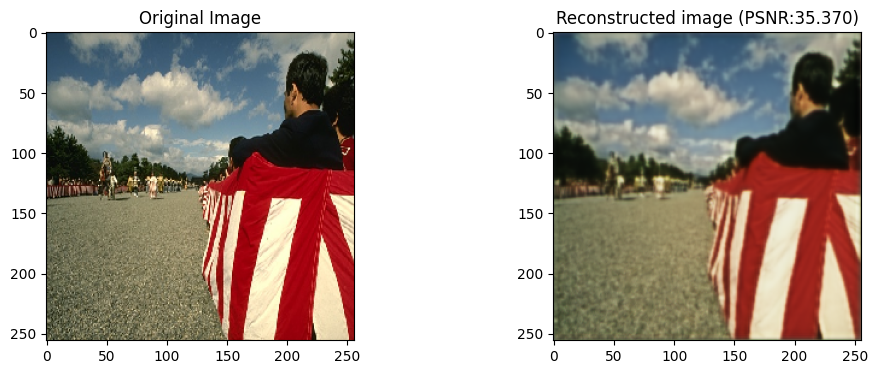

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
print("original shape", np.shape(train[48]))
ax[0].imshow(train[48])
ax[0].set_title("Original Image")

ax[1].imshow(train_pred[48])
ax[1].set_title("Reconstructed image (PSNR:35.370)")

In [ ]:
autoencoder6.save_weights('/content/drive/MyDrive/Colab Notebooks/TryingDiffArch2/arch6.h5')         # repo contains the weights of the model

In [ ]:
test_pred= autoencoder6.predict(test)
psnr_test=[]
for i in range(0,100):
  x= psnr(test[i],test_pred[i])
  psnr_test.append(x)

4/4 [==============================] - 20s 4s/step


In [ ]:
import statistics

# Mean_test
mean_value = statistics.mean(psnr_test)
print(f"MeanPSNR of test data: {mean_value}")
# Median_test
median_value = statistics.median(psnr_test)
print(f"MedianPSNR of test data: {median_value}")
# Standard Deviation_test
std_deviation = np.std(psnr_test)
print(f"Standard-DeviationPSNR of test data: {std_deviation}")

MeanPSNR of test data: 36.5802062140282
MedianPSNR of test data: 36.34567914788086
Standard-DeviationPSNR of test data: 1.280583891570791


## Architecture 7: (32x32x8) : 8,192

In [ ]:
# Input layer for 256x256x3 images
input_img = Input(shape=(256, 256, 3))

# Encoder
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
# p1 = Dropout(0.3)(x1)
p1 = MaxPooling2D((2, 2), padding='same')(x1)


x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
# p2 = Dropout(0.3)(x2)
p2 = MaxPooling2D((2, 2), padding='same')(x2)


x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
x3 = Conv2D(8, (3, 3), activation='relu', padding='same')(x3)
encoded = MaxPooling2D((2, 2), padding='same')(x3)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x3], axis=-1)  # Adding skip connection
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x2], axis=-1)  # Adding skip connection
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x1], axis=-1)  # Adding skip connection
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# This model maps an input to its reconstruction
autoencoder7 = Model(input_img, decoded)
autoencoder7.compile(optimizer='adam', loss='mse')
autoencoder7.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 32)         9248      ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)         0         ['conv2d_1[0][0]']            
 D)                                                                                           

In [ ]:
history= autoencoder7.fit(train, train, epochs=10, batch_size=12, validation_data=(val, val))

Epoch 1/10
13/13 [==============================] - 146s 11s/step - loss: 0.0551 - val_loss: 0.0653
Epoch 2/10
13/13 [==============================] - 114s 9s/step - loss: 0.0369 - val_loss: 0.0267
Epoch 3/10
13/13 [==============================] - 127s 10s/step - loss: 0.0224 - val_loss: 0.0189
Epoch 4/10
13/13 [==============================] - 116s 9s/step - loss: 0.0123 - val_loss: 0.0097
Epoch 5/10
13/13 [==============================] - 117s 9s/step - loss: 0.0086 - val_loss: 0.0090
Epoch 6/10
13/13 [==============================] - 114s 9s/step - loss: 0.0072 - val_loss: 0.0069
Epoch 7/10
13/13 [==============================] - 120s 9s/step - loss: 0.0060 - val_loss: 0.0060
Epoch 8/10
13/13 [==============================] - 121s 9s/step - loss: 0.0054 - val_loss: 0.0058
Epoch 9/10
13/13 [==============================] - 115s 9s/step - loss: 0.0049 - val_loss: 0.0046
Epoch 10/10
13/13 [==============================] - 115s 9s/step - loss: 0.0042 - val_loss: 0.0046


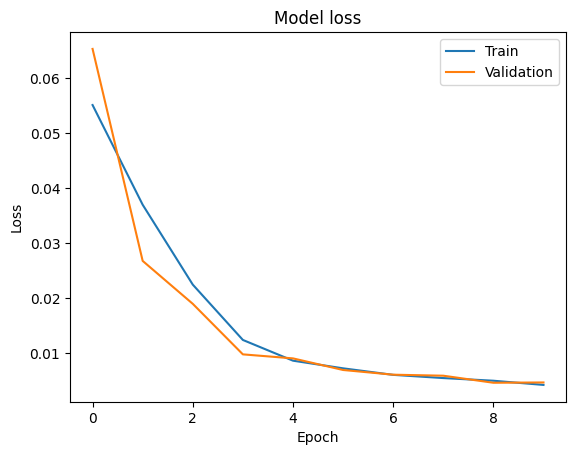

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
train_pred = autoencoder7.predict(train)

5/5 [==============================] - 28s 5s/step


In [ ]:
psnr(train[48],train_pred[48])

35.246716020767835

original shape (256, 256, 3)


Text(0.5, 1.0, 'Reconstructed image (PSNR:35.246)')

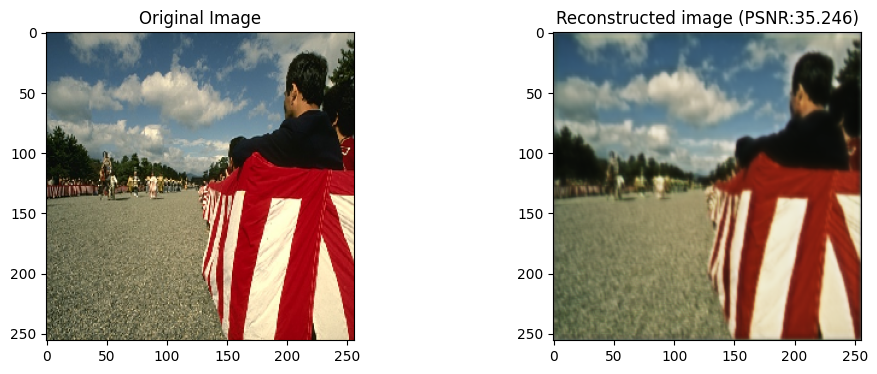

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
print("original shape", np.shape(train[48]))
ax[0].imshow(train[48])
ax[0].set_title("Original Image")

ax[1].imshow(train_pred[48])
ax[1].set_title("Reconstructed image (PSNR:35.246)")

In [ ]:
autoencoder7.load_weights('/content/drive/MyDrive/Colab Notebooks/TryingDiffArch2/arch7.h5')          # repo contains the weights of the model

### Architecture 8: 16x16x64

In [ ]:
# Input layer for 256x256x3 images
input_img = Input(shape=(256, 256, 3))

# Encoder
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
p1 = MaxPooling2D((2, 2), padding='same')(x1)


x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
p2 = MaxPooling2D((2, 2), padding='same')(x2)


x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
p3 = MaxPooling2D((2, 2), padding='same')(x3)

x4 = Conv2D(128, (3, 3), activation='relu', padding='same')(p3)    #learning even further
x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)

#bottleneck
encoded = MaxPooling2D((2, 2), padding='same')(x4)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x4], axis=-1)  # Adding skip connection
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x3], axis=-1)  # Adding skip connection
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x2], axis=-1)  # Adding skip connection
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x1], axis=-1)  # Adding skip connection
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder8 = Model(input_img,decoded)
autoencoder8.compile(optimizer='adam', loss='mse')
autoencoder8.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_143 (Conv2D)         (None, 256, 256, 32)         896       ['input_13[0][0]']            
                                                                                                  
 conv2d_144 (Conv2D)         (None, 256, 256, 32)         9248      ['conv2d_143[0][0]']          
                                                                                                  
 max_pooling2d_45 (MaxPooli  (None, 128, 128, 32)         0         ['conv2d_144[0][0]']          
 ng2D)                                                                                     

In [ ]:
history= autoencoder8.fit(train, train, epochs=10, batch_size=12, validation_data=(val, val))

Epoch 1/10
13/13 [==============================] - 214s 16s/step - loss: 0.0593 - val_loss: 0.0418
Epoch 2/10
13/13 [==============================] - 148s 11s/step - loss: 0.0354 - val_loss: 0.0223
Epoch 3/10
13/13 [==============================] - 146s 11s/step - loss: 0.0187 - val_loss: 0.0155
Epoch 4/10
13/13 [==============================] - 149s 11s/step - loss: 0.0134 - val_loss: 0.0113
Epoch 5/10
13/13 [==============================] - 145s 11s/step - loss: 0.0097 - val_loss: 0.0117
Epoch 6/10
13/13 [==============================] - 146s 11s/step - loss: 0.0089 - val_loss: 0.0080
Epoch 7/10
13/13 [==============================] - 145s 11s/step - loss: 0.0073 - val_loss: 0.0067
Epoch 8/10
13/13 [==============================] - 150s 12s/step - loss: 0.0063 - val_loss: 0.0062
Epoch 9/10
13/13 [==============================] - 146s 11s/step - loss: 0.0057 - val_loss: 0.0059
Epoch 10/10
13/13 [==============================] - 147s 11s/step - loss: 0.0058 - val_loss: 0.0056

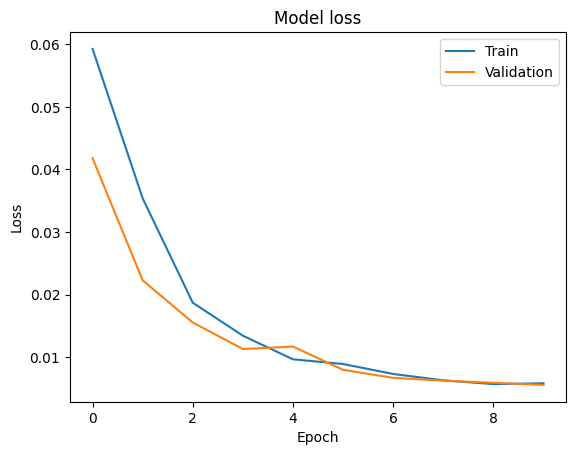

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
test_pred= autoencoder8.predict(test)
psnr_test=[]
for i in range(0,100):
  x= psnr(test[i],test_pred[i])
  psnr_test.append(x)

4/4 [==============================] - 32s 7s/step


In [ ]:
import statistics

# Mean_test
mean_value = statistics.mean(psnr_test)
print(f"MeanPSNR of test data: {mean_value}")
# Median_test
median_value = statistics.median(psnr_test)
print(f"MedianPSNR of test data: {median_value}")
# Standard Deviation_test
std_deviation = np.std(psnr_test)
print(f"Standard-DeviationPSNR of test data: {std_deviation}")

MeanPSNR of test data: 36.66189558189883
MedianPSNR of test data: 36.53423096808514
Standard-DeviationPSNR of test data: 1.1218283436428829


In [ ]:
autoencoder8.save_weights('/content/drive/MyDrive/Colab Notebooks/TryingDiffArch2/arch8.h5')        # repo contains the weights of the model

### Architecture 9: 16x16x16

In [ ]:
# Input layer for 256x256x3 images
input_img = Input(shape=(256, 256, 3))

# Encoder
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
p1 = MaxPooling2D((2, 2), padding='same')(x1)


x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
p2 = MaxPooling2D((2, 2), padding='same')(x2)


x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
p3 = MaxPooling2D((2, 2), padding='same')(x3)

x4 = Conv2D(128, (3, 3), activation='relu', padding='same')(p3)    #learning even further
x4 = Conv2D(16, (3, 3), activation='relu', padding='same')(x4)

#bottleneck
encoded = MaxPooling2D((2, 2), padding='same')(x4)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x4], axis=-1)  # Adding skip connection
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x3], axis=-1)  # Adding skip connection
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x2], axis=-1)  # Adding skip connection
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x1], axis=-1)  # Adding skip connection
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder9 = Model(input_img,decoded)
autoencoder9.compile(optimizer='adam', loss='mse')
autoencoder9.summary()

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_16 (InputLayer)       [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_183 (Conv2D)         (None, 256, 256, 32)         896       ['input_16[0][0]']            
                                                                                                  
 conv2d_184 (Conv2D)         (None, 256, 256, 32)         9248      ['conv2d_183[0][0]']          
                                                                                                  
 max_pooling2d_57 (MaxPooli  (None, 128, 128, 32)         0         ['conv2d_184[0][0]']          
 ng2D)                                                                                     

In [ ]:
history= autoencoder9.fit(train, train, epochs=10, batch_size=12, validation_data=(val, val))

Epoch 1/10
13/13 [==============================] - 218s 16s/step - loss: 0.0623 - val_loss: 0.0497
Epoch 2/10
13/13 [==============================] - 144s 11s/step - loss: 0.0351 - val_loss: 0.0254
Epoch 3/10
13/13 [==============================] - 143s 11s/step - loss: 0.0192 - val_loss: 0.0164
Epoch 4/10
13/13 [==============================] - 146s 11s/step - loss: 0.0130 - val_loss: 0.0116
Epoch 5/10
13/13 [==============================] - 141s 11s/step - loss: 0.0096 - val_loss: 0.0094
Epoch 6/10
13/13 [==============================] - 142s 11s/step - loss: 0.0076 - val_loss: 0.0075
Epoch 7/10
13/13 [==============================] - 143s 11s/step - loss: 0.0065 - val_loss: 0.0063
Epoch 8/10
13/13 [==============================] - 146s 11s/step - loss: 0.0057 - val_loss: 0.0056
Epoch 9/10
13/13 [==============================] - 154s 12s/step - loss: 0.0051 - val_loss: 0.0056
Epoch 10/10
13/13 [==============================] - 144s 11s/step - loss: 0.0046 - val_loss: 0.0043

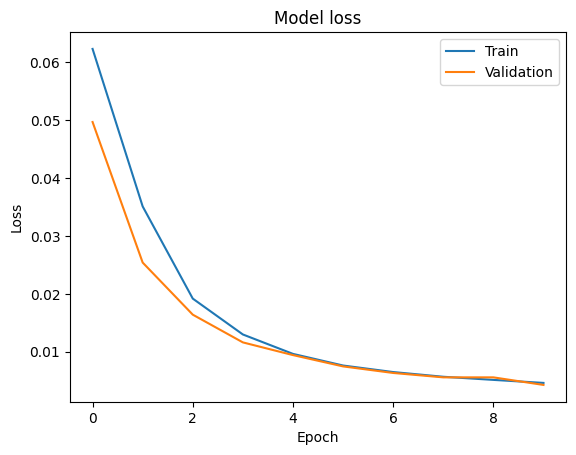

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
test_pred= autoencoder9.predict(test)
psnr_test=[]
for i in range(0,100):
  x= psnr(test[i],test_pred[i])
  psnr_test.append(x)

4/4 [==============================] - 32s 7s/step


In [ ]:
import statistics

# Mean_test
mean_value = statistics.mean(psnr_test)
print(f"MeanPSNR of test data: {mean_value}")
# Median_test
median_value = statistics.median(psnr_test)
print(f"MedianPSNR of test data: {median_value}")
# Standard Deviation_test
std_deviation = np.std(psnr_test)
print(f"Standard-DeviationPSNR of test data: {std_deviation}")

MeanPSNR of test data: 35.94656724461528
MedianPSNR of test data: 35.903971989333215
Standard-DeviationPSNR of test data: 1.005513931182149


In [ ]:
autoencoder9.save_weights('/content/drive/MyDrive/Colab Notebooks/TryingDiffArch2/arch9.h5')           # repo contains the weights of the model

### Architecture 10: 16x16x8

In [ ]:
# Input layer for 256x256x3 images
input_img = Input(shape=(256, 256, 3))

# Encoder
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
p1 = MaxPooling2D((2, 2), padding='same')(x1)


x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
p2 = MaxPooling2D((2, 2), padding='same')(x2)


x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
p3 = MaxPooling2D((2, 2), padding='same')(x3)

x4 = Conv2D(128, (3, 3), activation='relu', padding='same')(p3)    #learning even further
x4 = Conv2D(8, (3, 3), activation='relu', padding='same')(x4)

#bottleneck
encoded = MaxPooling2D((2, 2), padding='same')(x4)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x4], axis=-1)  # Adding skip connection
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x3], axis=-1)  # Adding skip connection
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x2], axis=-1)  # Adding skip connection
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x1], axis=-1)  # Adding skip connection
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder10 = Model(input_img,decoded)
autoencoder10.compile(optimizer='adam', loss='mse')
autoencoder10.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_23 (Conv2D)          (None, 256, 256, 32)         896       ['input_3[0][0]']             
                                                                                                  
 conv2d_24 (Conv2D)          (None, 256, 256, 32)         9248      ['conv2d_23[0][0]']           
                                                                                                  
 max_pooling2d_7 (MaxPoolin  (None, 128, 128, 32)         0         ['conv2d_24[0][0]']           
 g2D)                                                                                       

In [ ]:
history= autoencoder10.fit(train, train, epochs=10, batch_size=12, validation_data=(val, val))

Epoch 1/10
13/13 [==============================] - 186s 13s/step - loss: 0.0556 - val_loss: 0.0629
Epoch 2/10
13/13 [==============================] - 146s 11s/step - loss: 0.0411 - val_loss: 0.0298
Epoch 3/10
13/13 [==============================] - 148s 11s/step - loss: 0.0237 - val_loss: 0.0181
Epoch 4/10
13/13 [==============================] - 151s 12s/step - loss: 0.0156 - val_loss: 0.0148
Epoch 5/10
13/13 [==============================] - 155s 12s/step - loss: 0.0117 - val_loss: 0.0098
Epoch 6/10
13/13 [==============================] - 145s 11s/step - loss: 0.0083 - val_loss: 0.0081
Epoch 7/10
13/13 [==============================] - 145s 11s/step - loss: 0.0067 - val_loss: 0.0069
Epoch 8/10
13/13 [==============================] - 159s 12s/step - loss: 0.0062 - val_loss: 0.0059
Epoch 9/10
13/13 [==============================] - 146s 11s/step - loss: 0.0053 - val_loss: 0.0049
Epoch 10/10
13/13 [==============================] - 153s 12s/step - loss: 0.0045 - val_loss: 0.0049

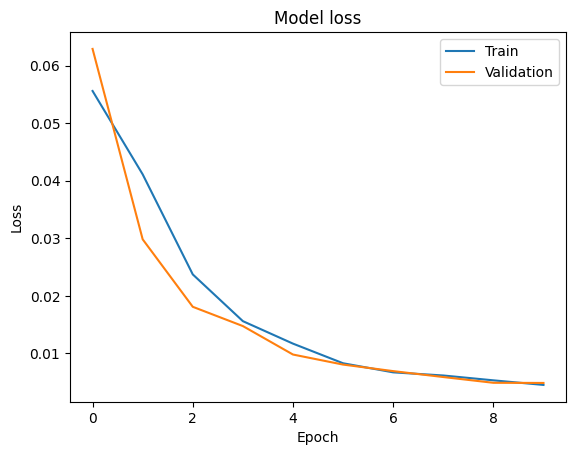

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
autoencoder10.load_weights('/content/drive/MyDrive/Colab Notebooks/TryingDiffArch2/arch10.h5')        # repo contains the weights of the model

In [ ]:
test_pred= autoencoder10.predict(test)
psnr_test=[]
for i in range(0,100):
  x= psnr(test[i],test_pred[i])
  psnr_test.append(x)

4/4 [==============================] - 39s 10s/step


In [ ]:
import statistics

# Mean_test
mean_value = statistics.mean(psnr_test)
print(f"MeanPSNR of test data: {mean_value}")
# Median_test
median_value = statistics.median(psnr_test)
print(f"MedianPSNR of test data: {median_value}")
# Standard Deviation_test
std_deviation = np.std(psnr_test)
print(f"Standard-DeviationPSNR of test data: {std_deviation}")

MeanPSNR of test data: 36.48775562209269
MedianPSNR of test data: 36.27903170350642
Standard-DeviationPSNR of test data: 1.1683878457172403


### Architecture 11: 8x8x64

In [ ]:
# Input layer for 256x256x3 images
input_img = Input(shape=(256, 256, 3))

# Encoder
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
p1 = MaxPooling2D((2, 2), padding='same')(x1)


x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
p2 = MaxPooling2D((2, 2), padding='same')(x2)


x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
p3 = MaxPooling2D((2, 2), padding='same')(x3)

x4 = Conv2D(128, (3, 3), activation='relu', padding='same')(p3)
x4 = Conv2D(128, (3, 3), activation='relu', padding='same')(x4)
p4 = MaxPooling2D((2, 2), padding='same')(x4)

x5 = Conv2D(128, (3, 3), activation='relu', padding='same')(p4)
x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x5)

#bottleneck
encoded = MaxPooling2D((2, 2), padding='same')(x5)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x5], axis=-1)  # Adding skip connection
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x4], axis=-1)  # Adding skip connection
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x3], axis=-1)  # Adding skip connection
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x2], axis=-1)  # Adding skip connection
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x1], axis=-1)  # Adding skip connection
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder11 = Model(input_img,decoded)
autoencoder11.compile(optimizer='adam', loss='mse')
autoencoder11.summary()

Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_18 (InputLayer)       [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_209 (Conv2D)         (None, 256, 256, 32)         896       ['input_18[0][0]']            
                                                                                                  
 conv2d_210 (Conv2D)         (None, 256, 256, 32)         9248      ['conv2d_209[0][0]']          
                                                                                                  
 max_pooling2d_65 (MaxPooli  (None, 128, 128, 32)         0         ['conv2d_210[0][0]']          
 ng2D)                                                                                     

In [ ]:
history= autoencoder11.fit(train, train, epochs=10, batch_size=12, validation_data=(val, val))

Epoch 1/10
13/13 [==============================] - 246s 18s/step - loss: 0.0507 - val_loss: 0.0351
Epoch 2/10
13/13 [==============================] - 157s 12s/step - loss: 0.0254 - val_loss: 0.0204
Epoch 3/10
13/13 [==============================] - 158s 12s/step - loss: 0.0147 - val_loss: 0.0117
Epoch 4/10
13/13 [==============================] - 165s 13s/step - loss: 0.0097 - val_loss: 0.0086
Epoch 5/10
13/13 [==============================] - 156s 12s/step - loss: 0.0067 - val_loss: 0.0062
Epoch 6/10
13/13 [==============================] - 161s 13s/step - loss: 0.0054 - val_loss: 0.0051
Epoch 7/10
13/13 [==============================] - 154s 12s/step - loss: 0.0045 - val_loss: 0.0041
Epoch 8/10
13/13 [==============================] - 151s 12s/step - loss: 0.0037 - val_loss: 0.0034
Epoch 9/10
13/13 [==============================] - 152s 12s/step - loss: 0.0031 - val_loss: 0.0027
Epoch 10/10
13/13 [==============================] - 155s 12s/step - loss: 0.0026 - val_loss: 0.0025

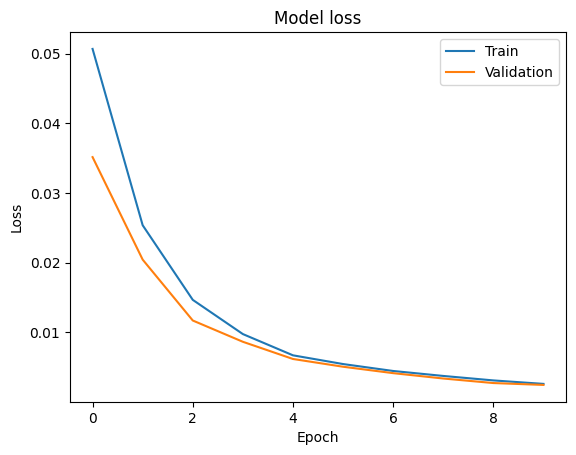

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
test_pred= autoencoder11.predict(test)
psnr_test=[]
for i in range(0,100):
  x= psnr(test[i],test_pred[i])
  psnr_test.append(x)

4/4 [==============================] - 25s 6s/step


In [ ]:
import statistics

# Mean_test
mean_value = statistics.mean(psnr_test)
print(f"MeanPSNR of test data: {mean_value}")
# Median_test
median_value = statistics.median(psnr_test)
print(f"MedianPSNR of test data: {median_value}")
# Standard Deviation_test
std_deviation = np.std(psnr_test)
print(f"Standard-DeviationPSNR of test data: {std_deviation}")

MeanPSNR of test data: 37.436771258425495
MedianPSNR of test data: 37.19403216845393
Standard-DeviationPSNR of test data: 1.1948260769973387


In [ ]:
autoencoder11.save_weights('/content/drive/MyDrive/Colab Notebooks/TryingDiffArch2/arch11.h5')       # repo contains the weights of the model

### Architecture 12: 8x8x16

In [ ]:
# Input layer for 256x256x3 images
input_img = Input(shape=(256, 256, 3))

# Encoder
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
p1 = MaxPooling2D((2, 2), padding='same')(x1)


x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
p2 = MaxPooling2D((2, 2), padding='same')(x2)


x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
p3 = MaxPooling2D((2, 2), padding='same')(x3)

x4 = Conv2D(128, (3, 3), activation='relu', padding='same')(p3)
x4 = Conv2D(128, (3, 3), activation='relu', padding='same')(x4)
p4 = MaxPooling2D((2, 2), padding='same')(x4)

x5 = Conv2D(128, (3, 3), activation='relu', padding='same')(p4)
x5 = Conv2D(16, (3, 3), activation='relu', padding='same')(x5)

#bottleneck
encoded = MaxPooling2D((2, 2), padding='same')(x5)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x5], axis=-1)  # Adding skip connection
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x4], axis=-1)  # Adding skip connection
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x3], axis=-1)  # Adding skip connection
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x2], axis=-1)  # Adding skip connection
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x1], axis=-1)  # Adding skip connection
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder12 = Model(input_img,decoded)
autoencoder12.compile(optimizer='adam', loss='mse')
autoencoder12.summary()

Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_19 (InputLayer)       [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_225 (Conv2D)         (None, 256, 256, 32)         896       ['input_19[0][0]']            
                                                                                                  
 conv2d_226 (Conv2D)         (None, 256, 256, 32)         9248      ['conv2d_225[0][0]']          
                                                                                                  
 max_pooling2d_70 (MaxPooli  (None, 128, 128, 32)         0         ['conv2d_226[0][0]']          
 ng2D)                                                                                     

In [ ]:
history= autoencoder12.fit(train, train, epochs=10, batch_size=12, validation_data=(val, val))

Epoch 1/10
13/13 [==============================] - 210s 16s/step - loss: 0.0602 - val_loss: 0.0493
Epoch 2/10
13/13 [==============================] - 154s 12s/step - loss: 0.0349 - val_loss: 0.0222
Epoch 3/10
13/13 [==============================] - 168s 13s/step - loss: 0.0152 - val_loss: 0.0105
Epoch 4/10
13/13 [==============================] - 164s 13s/step - loss: 0.0084 - val_loss: 0.0079
Epoch 5/10
13/13 [==============================] - 159s 12s/step - loss: 0.0074 - val_loss: 0.0076
Epoch 6/10
13/13 [==============================] - 153s 12s/step - loss: 0.0070 - val_loss: 0.0066
Epoch 7/10
13/13 [==============================] - 164s 13s/step - loss: 0.0060 - val_loss: 0.0058
Epoch 8/10
13/13 [==============================] - 158s 12s/step - loss: 0.0053 - val_loss: 0.0052
Epoch 9/10
13/13 [==============================] - 157s 12s/step - loss: 0.0047 - val_loss: 0.0044
Epoch 10/10
13/13 [==============================] - 154s 12s/step - loss: 0.0042 - val_loss: 0.0036

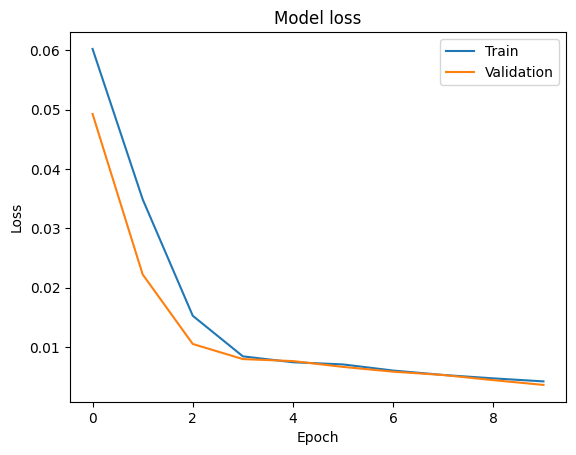

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
test_pred= autoencoder12.predict(test)
psnr_test=[]
for i in range(0,100):
  x= psnr(test[i],test_pred[i])
  psnr_test.append(x)

4/4 [==============================] - 23s 5s/step


In [ ]:
import statistics

# Mean_test
mean_value = statistics.mean(psnr_test)
print(f"MeanPSNR of test data: {mean_value}")
# Median_test
median_value = statistics.median(psnr_test)
print(f"MedianPSNR of test data: {median_value}")
# Standard Deviation_test
std_deviation = np.std(psnr_test)
print(f"Standard-DeviationPSNR of test data: {std_deviation}")

MeanPSNR of test data: 36.681969832554834
MedianPSNR of test data: 36.49436172874168
Standard-DeviationPSNR of test data: 1.2497727994512478


In [ ]:
autoencoder12.save_weights('/content/drive/MyDrive/Colab Notebooks/TryingDiffArch2/arch12.h5')         # repo contains the weights of the model

### Architecture 13: 8x8x8

In [ ]:
# Input layer for 256x256x3 images
input_img = Input(shape=(256, 256, 3))

# Encoder
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
p1 = MaxPooling2D((2, 2), padding='same')(x1)


x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
p2 = MaxPooling2D((2, 2), padding='same')(x2)


x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
p3 = MaxPooling2D((2, 2), padding='same')(x3)

x4 = Conv2D(128, (3, 3), activation='relu', padding='same')(p3)
x4 = Conv2D(128, (3, 3), activation='relu', padding='same')(x4)
p4 = MaxPooling2D((2, 2), padding='same')(x4)

x5 = Conv2D(128, (3, 3), activation='relu', padding='same')(p4)
x5 = Conv2D(8, (3, 3), activation='relu', padding='same')(x5)

#bottleneck
encoded = MaxPooling2D((2, 2), padding='same')(x5)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x5], axis=-1)  # Adding skip connection
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x4], axis=-1)  # Adding skip connection
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x3], axis=-1)  # Adding skip connection
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x2], axis=-1)  # Adding skip connection
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x1], axis=-1)  # Adding skip connection
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder13 = Model(input_img,decoded)
autoencoder13.compile(optimizer='adam', loss='mse')
autoencoder13.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 32)         9248      ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)         0         ['conv2d_1[0][0]']            
 D)                                                                                           

In [ ]:
history= autoencoder13.fit(train, train, epochs=10, batch_size=12, validation_data=(val, val))

Epoch 1/10
13/13 [==============================] - 187s 14s/step - loss: 0.0289 - val_loss: 0.0162
Epoch 2/10
13/13 [==============================] - 166s 13s/step - loss: 0.0089 - val_loss: 0.0058
Epoch 3/10
13/13 [==============================] - 163s 13s/step - loss: 0.0053 - val_loss: 0.0045
Epoch 4/10
13/13 [==============================] - 168s 13s/step - loss: 0.0039 - val_loss: 0.0036
Epoch 5/10
13/13 [==============================] - 173s 13s/step - loss: 0.0032 - val_loss: 0.0030
Epoch 6/10
13/13 [==============================] - 162s 13s/step - loss: 0.0028 - val_loss: 0.0026
Epoch 7/10
13/13 [==============================] - 168s 13s/step - loss: 0.0025 - val_loss: 0.0024
Epoch 8/10
13/13 [==============================] - 164s 13s/step - loss: 0.0023 - val_loss: 0.0021
Epoch 9/10
13/13 [==============================] - 172s 14s/step - loss: 0.0020 - val_loss: 0.0019
Epoch 10/10
13/13 [==============================] - 163s 13s/step - loss: 0.0018 - val_loss: 0.0018

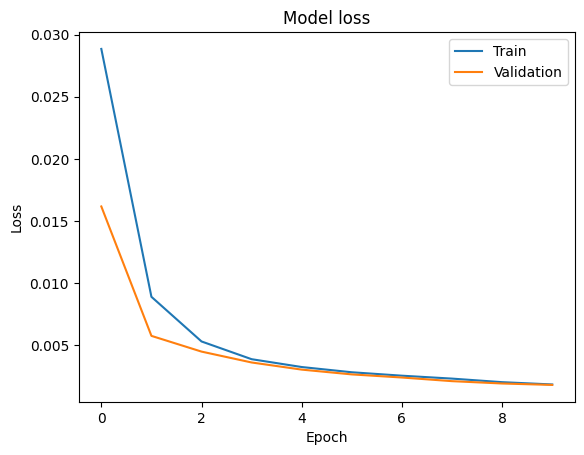

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
test_pred= autoencoder13.predict(test)
psnr_test=[]
for i in range(0,100):
  x= psnr(test[i],test_pred[i])
  psnr_test.append(x)

4/4 [==============================] - 39s 9s/step


In [ ]:
import statistics

# Mean_test
mean_value = statistics.mean(psnr_test)
print(f"MeanPSNR of test data: {mean_value}")
# Median_test
median_value = statistics.median(psnr_test)
print(f"MedianPSNR of test data: {median_value}")
# Standard Deviation_test
std_deviation = np.std(psnr_test)
print(f"Standard-DeviationPSNR of test data: {std_deviation}")

MeanPSNR of test data: 36.888762033992904
MedianPSNR of test data: 36.76194942590964
Standard-DeviationPSNR of test data: 1.1895962380515261


In [ ]:
autoencoder13.load_weights('/content/drive/MyDrive/Colab Notebooks/TryingDiffArch2/arch13.h5')       # repo contains the weights of the model